# 改装电流表校准曲线及准确度等级判定

- 横坐标：改装电流表读数 $I_X$ (mA)
- 纵坐标：误差 $\Delta I$ (mA)

数据来源：`processed_data/电流表改装记录表.csv`

<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
D:\Users\Temp\ipykernel_66160\2793874829.py:30: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('误差 $\Delta I$ (mA)')


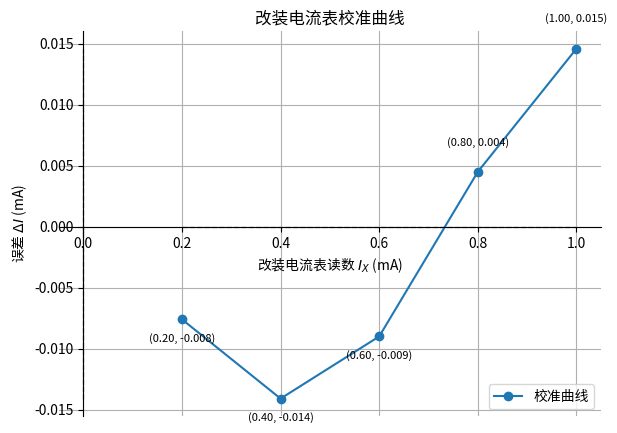

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置字体以支持中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Noto Sans SC', 'STSong', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
file = 'processed_data/电流表改装记录表.csv'
df = pd.read_csv(file)

# 转换数据类型
ix = pd.to_numeric(df['改装电流表读数 I_X/mA'], errors='coerce')
delta_i = pd.to_numeric(df['误差 ΔI/mA (ΔI = I_0 - I_X)'], errors='coerce')

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(ix, delta_i, 'o-', label='校准曲线')
# 只在数据范围内画灰色虚线
x_min, x_max = ix.min(), ix.max()
y_min, y_max = delta_i.min(), delta_i.max()
ax.plot([x_min, x_max], [0, 0], color='gray', linestyle='--', lw=1, zorder=1)
ax.plot([0, 0], [y_min, y_max], color='gray', linestyle='--', lw=1, zorder=1)

# 调整数字位置，避免重叠
for x, y in zip(ix, delta_i):
    offset = 0.002 if y >= 0 else -0.002
    ax.text(x, y + offset, f'({x:.2f}, {y:.3f})', fontsize=8, ha='center', va='bottom')

ax.set_xlabel('改装电流表读数 $I_X$ (mA)')
ax.set_ylabel('误差 $\Delta I$ (mA)')
ax.set_title('改装电流表校准曲线')
ax.legend()
ax.grid(True)
# 设置坐标轴穿过原点
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [5]:
# 计算最大误差
max_error = delta_i.abs().max()
print(f'最大误差 |ΔI| = {max_error:.4f} mA')

# 假设准确度等级标准如下（示例）：
# 0.2级：最大允许误差为量程的±0.2%
# 0.5级：最大允许误差为量程的±0.5%
# 1.0级：最大允许误差为量程的±1.0%

full_scale = ix.max()  # 量程
if max_error <= full_scale * 0.002:
    level = '0.2级'
elif max_error <= full_scale * 0.005:
    level = '0.5级'
elif max_error <= full_scale * 0.01:
    level = '1.0级'
else:
    level = '大于1.0级'
print(f'准确度等级：{level}')

最大误差 |ΔI| = 0.0146 mA
准确度等级：大于1.0级


# 改装电压表校准曲线及准确度等级判定

- 横坐标：改装电压表读数 $U_X$ (V)
- 纵坐标：误差 $\Delta U$ (V)

数据来源：`processed_data/电压表改装记录表.csv`

<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
D:\Users\Temp\ipykernel_66160\2726486874.py:30: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel('误差 $\Delta U$ (V)')


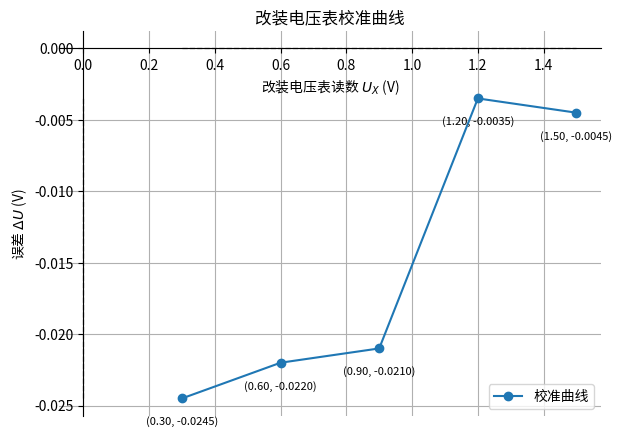

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置字体以支持中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Noto Sans SC', 'STSong', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
file_v = 'processed_data/电压表改装记录表.csv'
df_v = pd.read_csv(file_v)

# 转换数据类型
ux = pd.to_numeric(df_v['改装电压表读数 U_X/V'], errors='coerce')
delta_u = pd.to_numeric(df_v['误差 ΔU/V (ΔU = U_0 - U_X)'], errors='coerce')

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(ux, delta_u, 'o-', label='校准曲线')
# 只在数据范围内画灰色虚线
x_min, x_max = ux.min(), ux.max()
y_min, y_max = delta_u.min(), delta_u.max()
ax.plot([x_min, x_max], [0, 0], color='gray', linestyle='--', lw=1, zorder=1)
ax.plot([0, 0], [y_min, y_max], color='gray', linestyle='--', lw=1, zorder=1)

# 标注数据点
for x, y in zip(ux, delta_u):
    offset = 0.002 if y >= 0 else -0.002
    ax.text(x, y + offset, f'({x:.2f}, {y:.4f})', fontsize=8, ha='center', va='bottom')

ax.set_xlabel('改装电压表读数 $U_X$ (V)')
ax.set_ylabel('误差 $\Delta U$ (V)')
ax.set_title('改装电压表校准曲线')
ax.legend(loc='lower right')
ax.grid(True)
# 设置坐标轴穿过原点
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [ ]:
# 计算最大误差
max_error_u = delta_u.abs().max()
print(f'最大误差 |ΔU| = {max_error_u:.4f} V')

# 假设准确度等级标准如下（示例）：
# 0.2级：最大允许误差为量程的±0.2%
# 0.5级：最大允许误差为量程的±0.5%
# 1.0级：最大允许误差为量程的±1.0%

full_scale_u = ux.max()  # 量程
if max_error_u <= full_scale_u * 0.002:
    level_u = '0.2级'
elif max_error_u <= full_scale_u * 0.005:
    level_u = '0.5级'
elif max_error_u <= full_scale_u * 0.01:
    level_u = '1.0级'
else:
    level_u = '大于1.0级'
print(f'准确度等级：{level_u}')